**Source**  
[UCI source](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)  
[Data folder](http://archive.ics.uci.edu/ml/machine-learning-databases/00235/)

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

**Data Set Information**  

This archive contains **2075259** measurements gathered in a house located in Sceaux (7 km of Paris, France) between **December 2006** and **November 2010** (**47 months**).  

Notes:  
  1. The expression **(1000/60)*GlobalActivePower - S1 - S2 - S3**  
  represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in   sub-meterings 1, 2 and 3.
  2. The dataset contains some missing values in the measurements (nearly **1.25% of the rows**).  
  All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing:  
  a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.
  

Submetering 1: $S_1$  
Submetering 2: $S_2$  
Submetering 3: $S_3$  
Global active power: $P_{active}$  
  
Active energy consumed: $E_{active}$ is then described by:  
  
  
  
  
$$E_{active} = \frac{1000}{60}P_{active} - (S_1 + S_2 + S_3)$$


**Attribute Information**

  1. **date**: Date in format **dd/mm/yyyy**
  2. **time**: time in format **hh:mm:ss**
  3. **GlobalActivePower**: household global minute-averaged active power (in **kilowatt**)
  4. **GlobalReactivePower**: household global minute-averaged reactive power (in **kilowatt**)
  5. **Voltage**: minute-averaged voltage (in **volt**)
  6. **GlobalIntensity**: household global minute-averaged current intensity (in **ampere**)
  7. **S1**: energy sub-metering No. 1 (in **watt-hour** of active energy).  
  It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but     gas powered).
  8.  **S2**: energy sub-metering No. 2 (in **watt-hour** of active energy).  
  It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
  9.  **S3**: energy sub-metering No. 3 (in **watt-hour** of active energy).  
  It corresponds to an electric water-heater and an air-conditioner.
 

**Relevant Papers**

N/A


**Citation Request**

This dataset is made available under the “Creative Commons Attribution 4.0 International (CC BY 4.0)” license

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerdata

powerdataframe = powerdata.load_and_preprocess_data()

/home/dreuter/Github/kaggle-paths/household-power/data/power-data.zip
already exists, file not downloaded
txt file already exists in
/home/dreuter/Github/kaggle-paths/household-power/data,
no files extracted


In [5]:
powerdataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
Date                   object
Time                   object
GlobalActivePower      float64
GlobalReactivePower    float64
Voltage                float64
GlobalIntensity        float64
S1                     float64
S2                     float64
S3                     float64
dtypes: float64(7), object(2)
memory usage: 158.3+ MB


In [6]:
powerdataframe.describe()

,GlobalActivePower,GlobalReactivePower,Voltage,GlobalIntensity,S1,S2,S3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


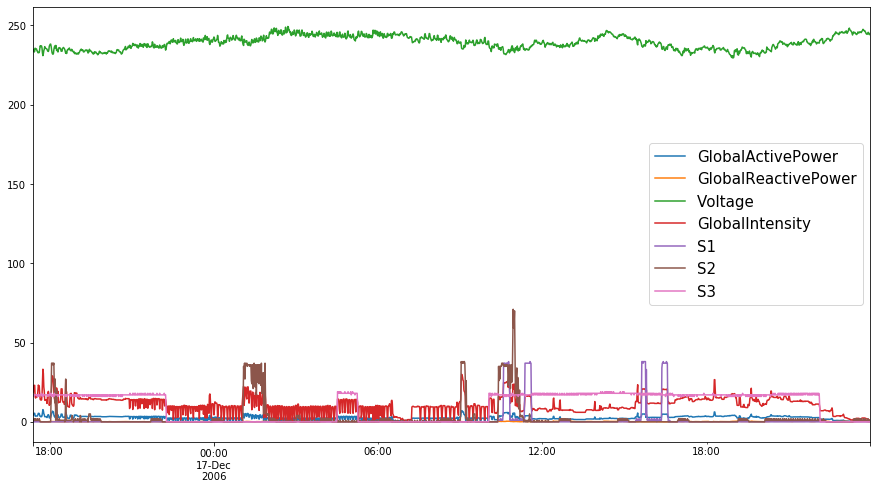

In [7]:
powerdataframe['2006-12-16':'2006-12-17'].plot(figsize = (15,8))
plt.legend(fontsize=15)
plt.show()

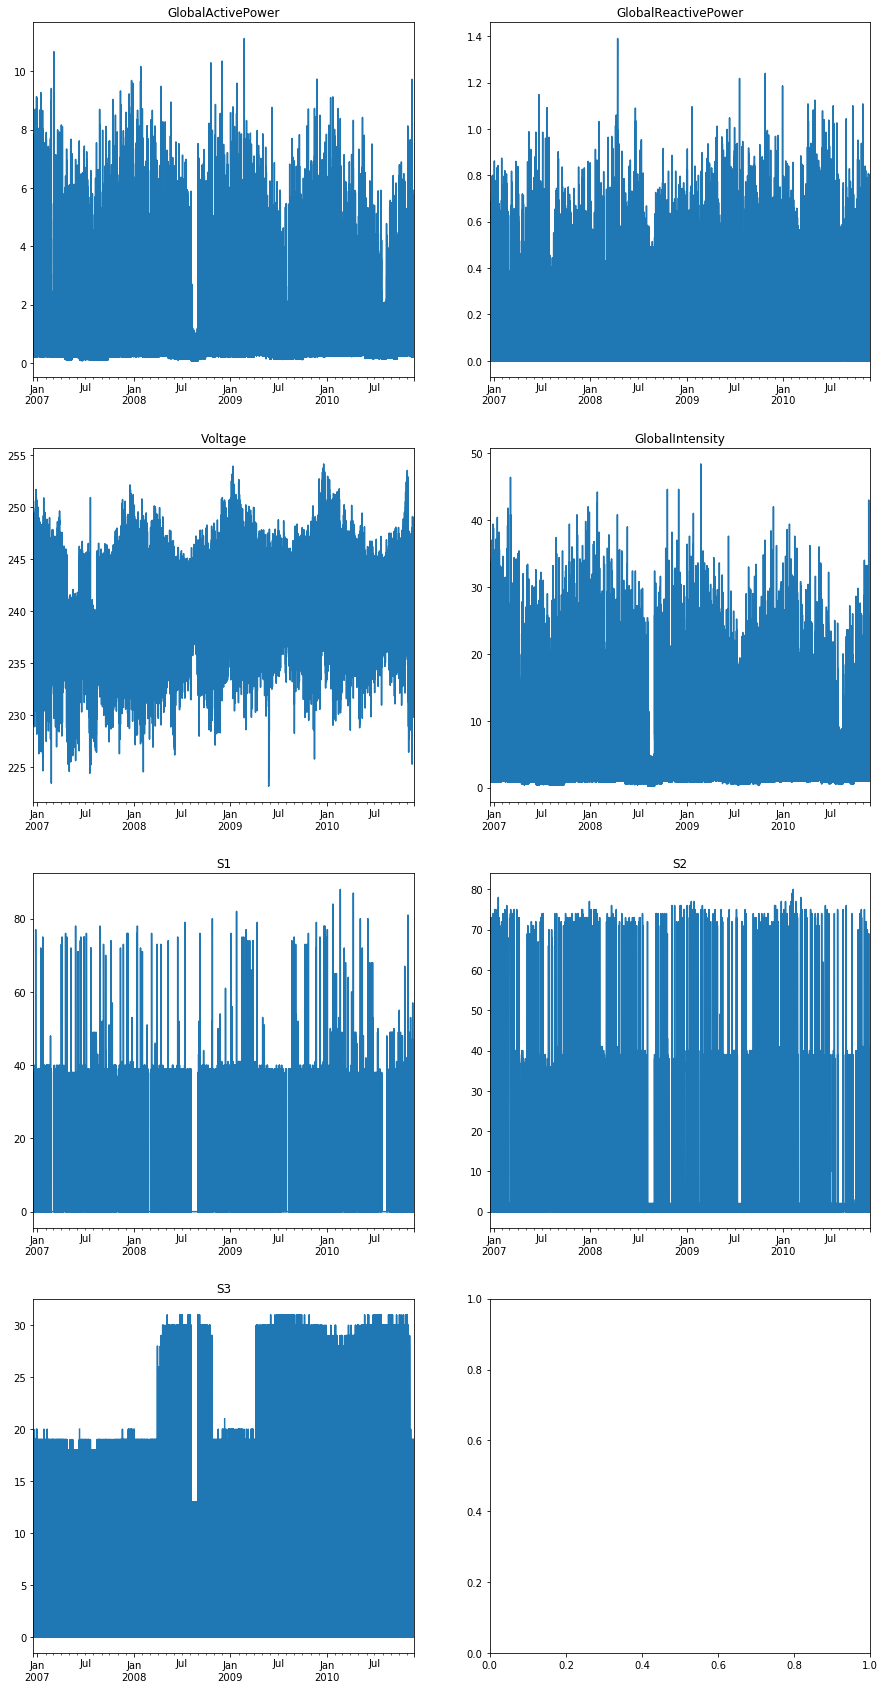

In [8]:
first = 2000
fig, axes = plt.subplots(4,2,figsize=(15,30))
n=1
for i in range(4):
    for j in range(2):
        n+=1
        if n<len(powerdataframe.columns):
            powerdataframe.iloc[:,n].plot(ax=axes[i,j])
            axes[i,j].set_title(powerdataframe.columns[n])
plt.show()

In [19]:
powerdataframe.columns.shape

(9,)